<a href="https://colab.research.google.com/github/deralph/car-prediction-model-kaggle-skill-assesment/blob/main/kaggleAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV,BayesianRidge
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import re

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
test=pd.read_csv('test.csv',index_col='id')
train=pd.read_csv('train.csv',index_col='id')

In [4]:
print(test.shape)
print(train.shape)

(36183, 11)
(54273, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


In [6]:
train.duplicated().sum()

0

In [7]:
train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [8]:
train.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250


In [9]:
display(train.describe())
display(train.describe())

,model_year,milage,price
count,54273.00,54273.00,54273.00
mean,2015.09,72746.18,39218.44
std,5.59,50469.49,72826.34
min,1974.00,100.00,2000.00
25%,2012.00,32268.00,15500.00
50%,2016.00,66107.00,28000.00
75%,2019.00,102000.00,45000.00
max,2024.00,405000.00,2954083.00


,model_year,milage,price
count,54273.00,54273.00,54273.00
mean,2015.09,72746.18,39218.44
std,5.59,50469.49,72826.34
min,1974.00,100.00,2000.00
25%,2012.00,32268.00,15500.00
50%,2016.00,66107.00,28000.00
75%,2019.00,102000.00,45000.00
max,2024.00,405000.00,2954083.00


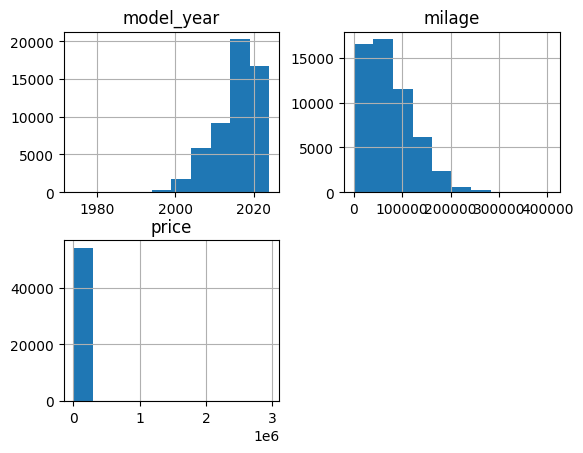

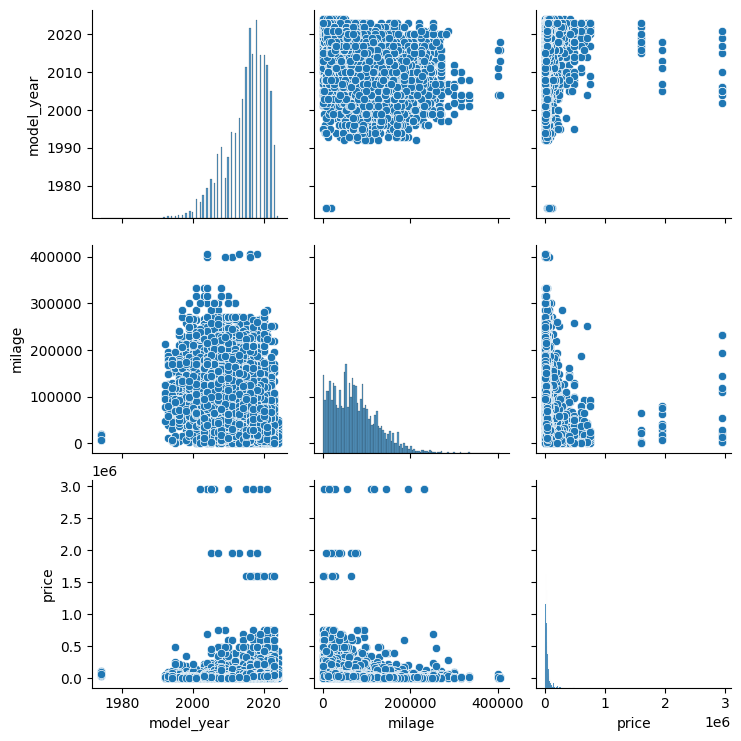

In [10]:
train.hist()
sns.pairplot(data=train)

In [11]:
for dataset in [train,test]:
  print(dataset.isna().sum(),'\n')

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64 

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64 



In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


In [13]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [14]:
for i in categorical_columns:
    print(i)
    print(train[i].unique().shape)
    # print(train[i].value_counts())

brand
(53,)
model
(1827,)
fuel_type
(7,)
engine
(1061,)
transmission
(46,)
ext_col
(260,)
int_col
(124,)
accident
(2,)
clean_title
(1,)


In [15]:
train['clean_title'].value_counts()

clean_title
Yes    54273
Name: count, dtype: int64

In [16]:
for dataset in [train,test]:
  dataset.drop(columns=['clean_title'],axis=1,inplace=True)

In [17]:
for dataset in [train,test]:
  print(dataset['accident'].value_counts(),'\n')

accident
None reported                             39896
At least 1 accident or damage reported    14377
Name: count, dtype: int64 

accident
None reported                             26598
At least 1 accident or damage reported     9585
Name: count, dtype: int64 



In [18]:
for dataset in [train,test]:
  dataset['accident']=dataset['accident'].apply(lambda x: 0 if x=='None reported' else 1)


In [19]:
for dataset in [train,test]:
  print(dataset['accident'].value_counts(),'\n')

accident
0    39896
1    14377
Name: count, dtype: int64 

accident
0    26598
1     9585
Name: count, dtype: int64 



In [20]:
train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')

In [21]:
train['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [22]:
for df in [train,test]:
  df['fuel_type']=df['fuel_type'].apply(lambda x: 'unknown' if (x=='–' or x=='not supported') else x)


In [23]:
for df in [train,test]:
  print(df['fuel_type'].value_counts(),'\n')

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
unknown             298
Plug-In Hybrid      182
Name: count, dtype: int64 

fuel_type
Gasoline          33033
Hybrid             1112
E85 Flex Fuel      1018
Diesel              671
unknown             201
Plug-In Hybrid      148
Name: count, dtype: int64 



In [24]:
train['transmission'].value_counts().head()

transmission
A/T                               16757
8-Speed A/T                        7287
Transmission w/Dual Shift Mode     6454
6-Speed A/T                        5944
6-Speed M/T                        3618
Name: count, dtype: int64

In [25]:
def predictTransmissionMode(x):
  x=x.lower()
  if 'dual' in x or 'at/mt' in x:
    return 'dual'
  elif 'scheduled' in x or x=='–' :
    return 'unknown'
  elif 'm/t'in x or 'manual' in x :
    return 'manual'
  elif 'a/t' in x or 'automatic' in x or 'cvt' in x or x=='f'  or x=='variable':
    return 'automatic'

In [26]:
for df in [train,test]:
  df['transmission_mode']=df['transmission'].apply(predictTransmissionMode)

In [27]:
for df in [train,test]:
   print(df['transmission_mode'].value_counts(),'\n')

transmission_mode
automatic    42879
dual          6455
manual        4864
unknown          9
Name: count, dtype: int64 

transmission_mode
automatic    28540
dual          4266
manual        3326
unknown          5
Name: count, dtype: int64 



In [28]:
top_colors = ['black', 'beige', 'gray', 'red', 'white', 'silver', 'blue', 'green', 'gold', 'brown', 'orange', 'yellow']

def transformColor(x):
    x = x.lower()
    for color in top_colors:
        if color in x and '/' not in x:
            return color
    return 'other'


In [29]:
# Applying the transformation
for df in [train,test]:
  df['ext_col'] = df['ext_col'].apply(transformColor)
  df['int_col'] = df['int_col'].apply(transformColor)
  print(df['ext_col'].value_counts())
  print(df['int_col'].value_counts())


ext_col
black     15673
white     13825
gray       8019
silver     5364
blue       4793
red        3271
green       782
other       576
gold        484
beige       460
brown       390
orange      330
yellow      306
Name: count, dtype: int64
int_col
black     32316
beige      8035
gray       6287
brown      2255
other      1887
red        1544
white      1179
orange      253
blue        230
silver      129
gold         95
green        56
yellow        7
Name: count, dtype: int64
ext_col
black     10408
white      9095
gray       5466
silver     3595
blue       3230
red        2201
green       540
other       331
gold        328
brown       294
beige       254
orange      239
yellow      202
Name: count, dtype: int64
int_col
black     21431
beige      5489
gray       4315
brown      1350
other      1223
red        1085
white       773
orange      208
blue        139
silver       89
gold         55
green        21
yellow        5
Name: count, dtype: int64


In [30]:
from datetime import datetime

current_year = datetime.now().year

for df in [train,test]:
  # Create the age column
  df['age'] = current_year - df['model_year']
  df.drop(columns=['model_year'],axis=1,inplace=True)
train['age'].head()

id
0     6
1    17
2    15
3     2
4    23
Name: age, dtype: int64

In [31]:
train['engine'].value_counts().head()

engine
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    1452
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             1125
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             1054
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel             979
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              893
Name: count, dtype: int64

In [32]:


# Feature extraction from engine  functions
def extract_engine_size(engine):
    match = re.search(r'(\d+(\.\d+)?)L', engine)
    return float(match.group(1)) if match else None

def extract_cylinders(engine):
    match = re.search(r'(\d+)\s+Cylinder', engine)
    return int(match.group(1)) if match else None

def extract_horsepower(engine):
    match = re.search(r'(\d+(\.\d+)?)HP', engine)
    return float(match.group(1)) if match else None

def extract_fuel_type(engine):
    if 'Electric' in engine or 'Battery' in engine:
        return 'Electric'
    elif 'Flex Fuel' in engine:
        return 'Flex Fuel'
    elif 'Gasoline' in engine:
        return 'Gasoline'
    else:
        return 'Unknown'

def extract_turbocharged(engine):
    return 1 if 'Turbo' in engine or 'Twin Turbo' in engine else 0

def extract_configuration(engine):
    match = re.search(r'(Straight \d+|V\d+|I4|Flat \d+)', engine)
    return match.group(0) if match else None

def extract_valve_count(engine):
    match = re.search(r'(\d+)V', engine)
    return int(match.group(1)) if match else None



In [33]:
def TransformEndine(df):
  # Feature engineering on engine column

  engine_df = pd.DataFrame()


   # Applying feature extraction
  engine_df['engine_size_L'] = df['engine'].apply(extract_engine_size)
  engine_df['cylinder_count'] = df['engine'].apply(extract_cylinders)
  engine_df['horsepower_HP'] = df['engine'].apply(extract_horsepower)
  engine_df['Fuel_Type'] = df['engine'].apply(extract_fuel_type)
  engine_df['turbocharged'] = df['engine'].apply(extract_turbocharged)
  engine_df['engine_configuration'] = df['engine'].apply(extract_configuration)
  engine_df['valve_count'] = df['engine'].apply(extract_valve_count)

  return engine_df

In [34]:
train_engine_df=TransformEndine(train)
train_engine_df.head()

,engine_size_L,cylinder_count,horsepower_HP,Fuel_Type,turbocharged,engine_configuration,valve_count
id,,,,,,,
0,3.50,6.00,375.00,Gasoline,0,V6,NaN
1,3.00,6.00,300.00,Gasoline,0,Straight 6,NaN
2,4.20,8.00,300.00,Gasoline,0,None,NaN
3,3.00,6.00,335.00,Electric,0,Straight 6,NaN
4,3.80,6.00,200.00,Gasoline,0,V6,NaN


In [35]:
train['engine'].head()

id
0        375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
1    300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
2         300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel
3    335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
4        200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel
Name: engine, dtype: object

In [36]:
test_engine_df=TransformEndine(test)
test_engine_df.head()

,engine_size_L,cylinder_count,horsepower_HP,Fuel_Type,turbocharged,engine_configuration,valve_count
id,,,,,,,
54273,3.50,6.00,302.00,Gasoline,0,V6,NaN
54274,3.50,6.00,275.00,Gasoline,0,V6,NaN
54275,2.00,4.00,241.00,Gasoline,0,None,NaN
54276,5.00,8.00,518.00,Gasoline,0,None,NaN
54277,3.00,6.00,335.00,Gasoline,0,Straight 6,NaN


In [37]:
for df in [train_engine_df,test_engine_df]:
   print(df['turbocharged'].value_counts(),'\n')

turbocharged
0    52405
1     1868
Name: count, dtype: int64 

turbocharged
0    35004
1     1179
Name: count, dtype: int64 



In [38]:
for df in [train_engine_df,test_engine_df]:
   df['Fuel_Type'].value_counts()

In [39]:
for df in [train_engine_df,test_engine_df]:
  null_values=df.isna().sum()
  null_percentage = df.isnull().mean() * 100
  print('null values = \n ',null_values,'\n')
  print('percentage = \n',null_percentage)

null values = 
  engine_size_L             606
cylinder_count           4175
horsepower_HP            4057
Fuel_Type                   0
turbocharged                0
engine_configuration    28461
valve_count             50738
dtype: int64 

percentage = 
 engine_size_L           1.12
cylinder_count          7.69
horsepower_HP           7.48
Fuel_Type               0.00
turbocharged            0.00
engine_configuration   52.44
valve_count            93.49
dtype: float64
null values = 
  engine_size_L             405
cylinder_count           2712
horsepower_HP            2606
Fuel_Type                   0
turbocharged                0
engine_configuration    19083
valve_count             33908
dtype: int64 

percentage = 
 engine_size_L           1.12
cylinder_count          7.50
horsepower_HP           7.20
Fuel_Type               0.00
turbocharged            0.00
engine_configuration   52.74
valve_count            93.71
dtype: float64


In [40]:
# Handling null values
for df in [train_engine_df,test_engine_df]:
  df.drop(columns=['valve_count','Fuel_Type','engine_configuration'],axis=1,inplace=True)

In [41]:
for df in [train_engine_df,test_engine_df]:
  df['engine_size_L'].fillna(train_engine_df['engine_size_L'].mean(), inplace=True)
  df['cylinder_count'].fillna(train_engine_df['cylinder_count'].median(), inplace=True)
  df['horsepower_HP'].fillna(train_engine_df['horsepower_HP'].mean(), inplace=True)
  # df['engine_configuration'].fillna('Unknown', inplace=True)


In [42]:
train_engine_df.head()

,engine_size_L,cylinder_count,horsepower_HP,turbocharged
id,,,,
0,3.50,6.00,375.00,0
1,3.00,6.00,300.00,0
2,4.20,8.00,300.00,0
3,3.00,6.00,335.00,0
4,3.80,6.00,200.00,0


In [43]:
train=pd.concat([train,train_engine_df],axis=1)
test=pd.concat([test,test_engine_df],axis=1)

In [44]:
for df in [train,test]:
  print(df.shape)

(54273, 16)
(36183, 15)


In [45]:
for df in [train,test]:
  df.drop(columns=['engine','transmission'],axis=1,inplace=True)

In [46]:
for i in ['brand','model']:
  print(train[i].value_counts().head())


brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Name: count, dtype: int64
model
F-150 XLT             780
M3 Base               682
X5 xDrive35i          615
F-150 Lariat          496
Mustang GT Premium    466
Name: count, dtype: int64


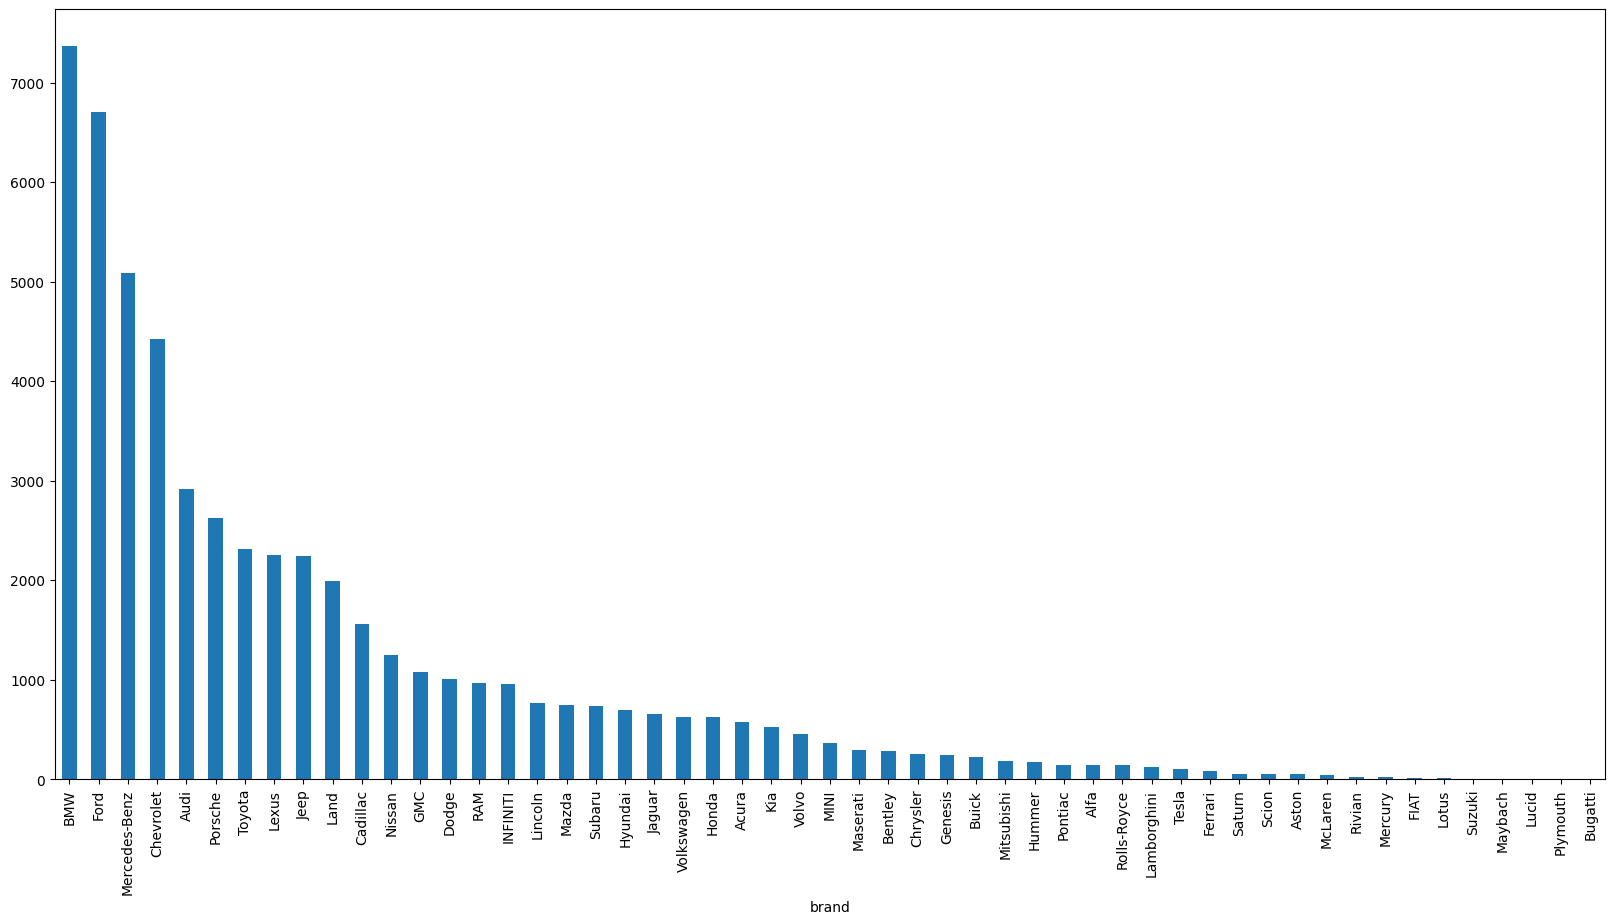

In [47]:
train['brand'].value_counts().plot(kind='bar',figsize=(20,10),stacked=False)
plt.show()

In [48]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()

    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()

    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)

    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [49]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)

    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]

        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        cv_test_feature.shape

        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature
    return train_feature.values

In [50]:
def mean_target_encoding(train, test, target, categorical, alpha=5):

    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)

    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)

    # Return new features to add to the model
    return train_feature, test_feature

In [51]:
for i in ['brand','model']:
  test_feature=test_mean_target_encoding(train,test,target='price',categorical=i,alpha=5)
  test[i]=test_feature


In [52]:
train.head(1)

,brand,model,milage,fuel_type,ext_col,int_col,accident,price,transmission_mode,age,engine_size_L,cylinder_count,horsepower_HP,turbocharged
id,,,,,,,,,,,,,,
0,Ford,F-150 Lariat,74349,Gasoline,blue,gray,0,11000,automatic,6,3.50,6.00,375.00,0


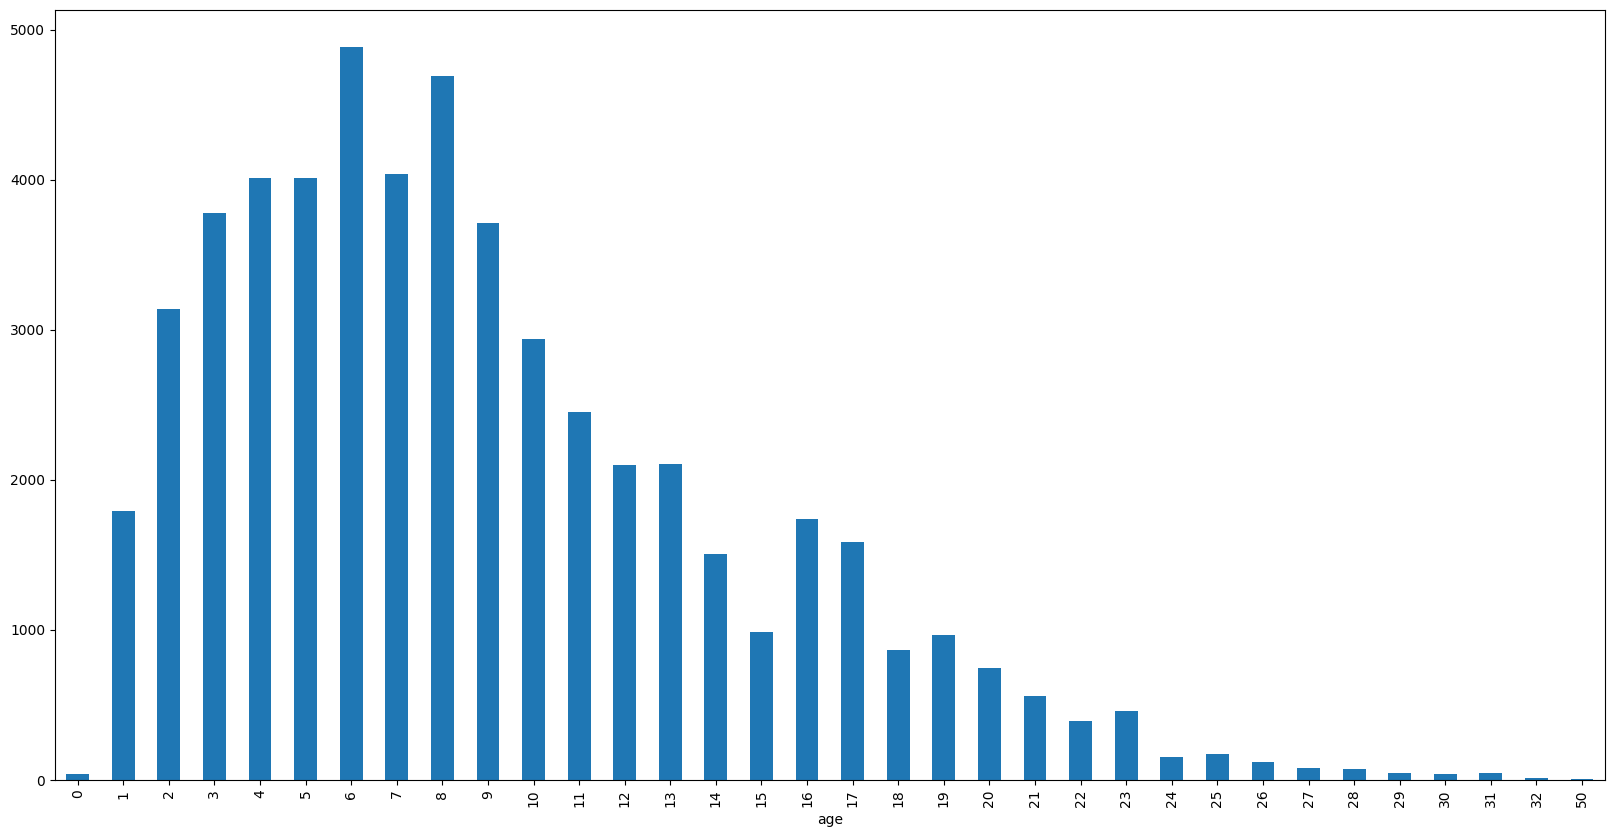

In [53]:
train['age'].value_counts().sort_index().plot(kind='bar',figsize=(20,10),stacked=False)
plt.show()

In [54]:
# int_columns = train.select_dtypes(include=['int64','float64']).columns.drop('price').tolist()

for df in [train,test]:
  for col in df.select_dtypes(include=['int64','float64']).columns.tolist():
    df[col]=np.sqrt(df[col])
    print(col)
    # df.drop(columns=[col],axis=1,inplace=True)


milage
accident
price
age
engine_size_L
cylinder_count
horsepower_HP
turbocharged
brand
model
milage
accident
age
engine_size_L
cylinder_count
horsepower_HP
turbocharged


<Figure size 2000x1200 with 0 Axes>

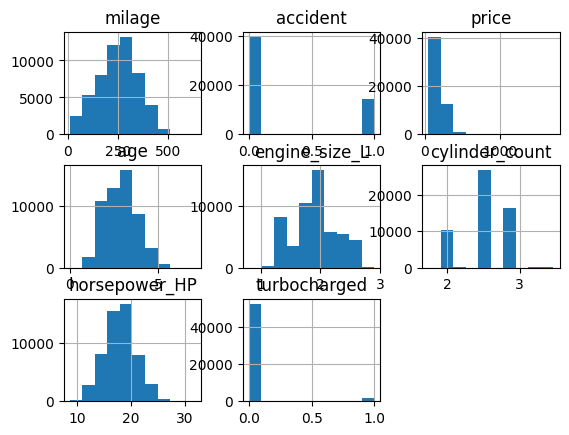

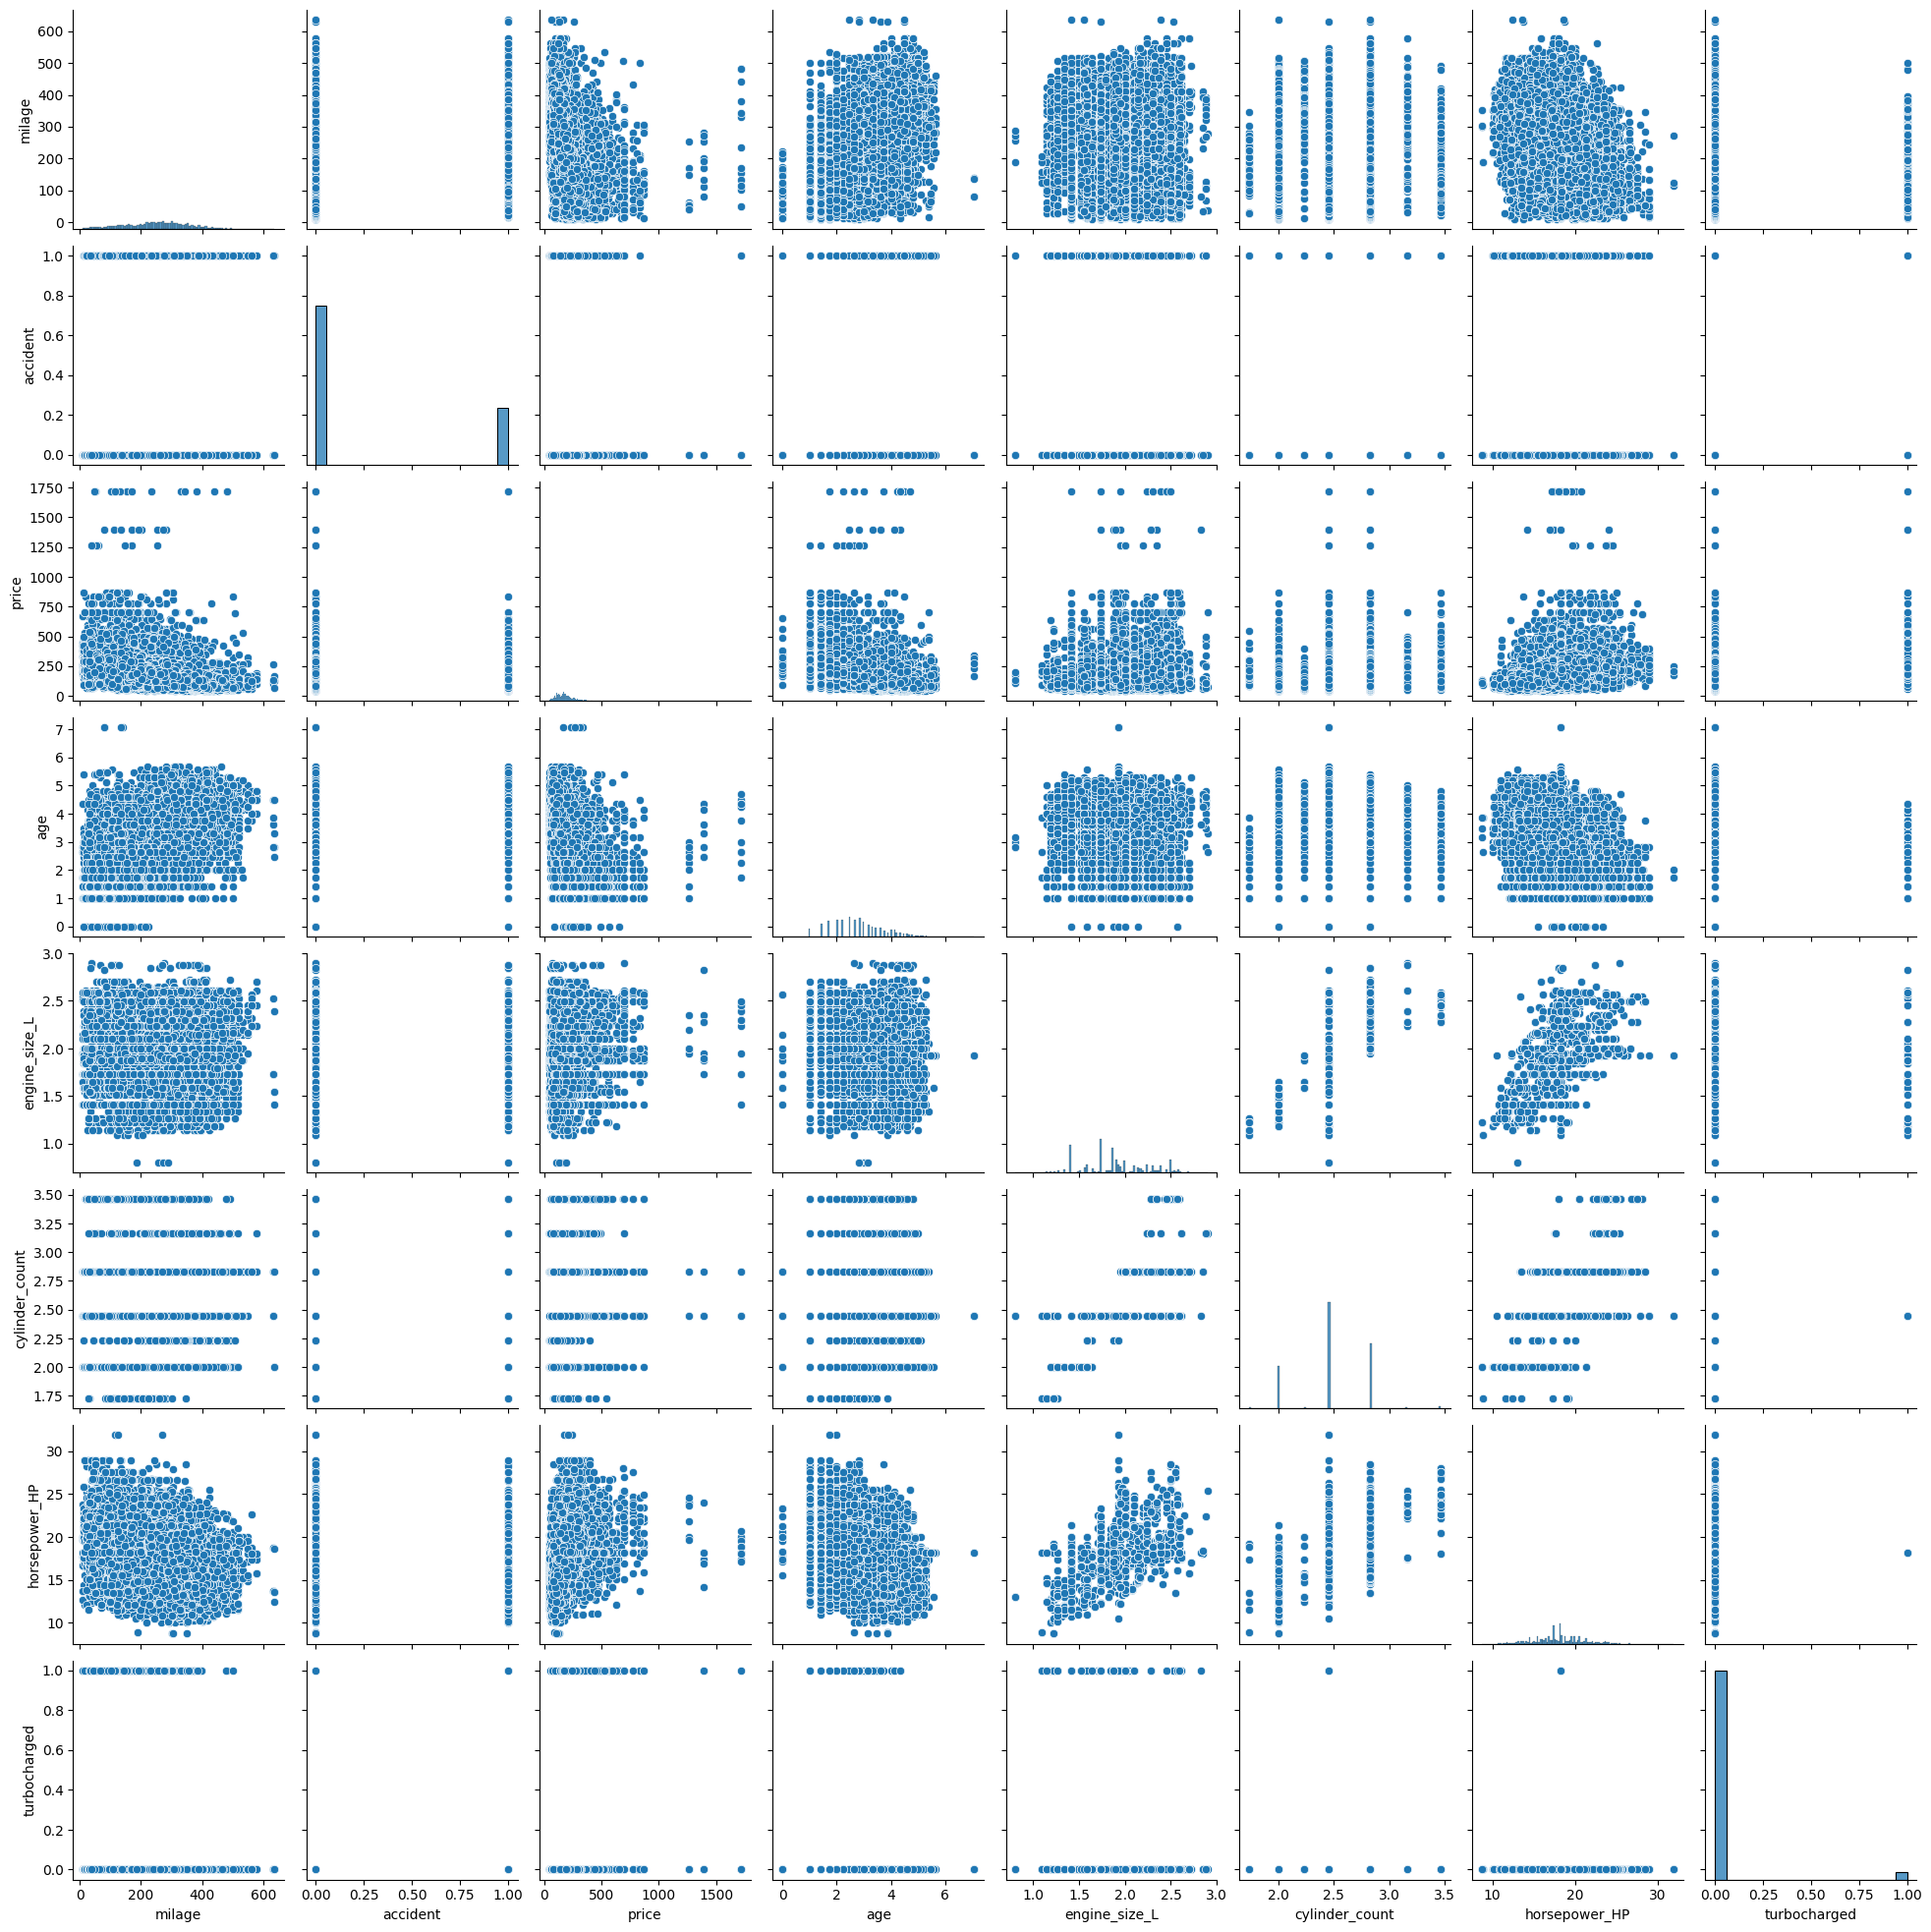

In [55]:
plt.figure(figsize=(20,12))
train.hist()
sns.pairplot(data=train)


In [56]:
def remove_outliers(data,column, k=1.5):
    IQR=iqr(train[column])
    q1,q3=np.quantile(train[column],[0.25,0.75])

    lower_bound = q1 - (k * IQR)
    upper_bound = q3 + (k * IQR)
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


Text(0.5, 1.0, 'Car Price Distribution Plot')

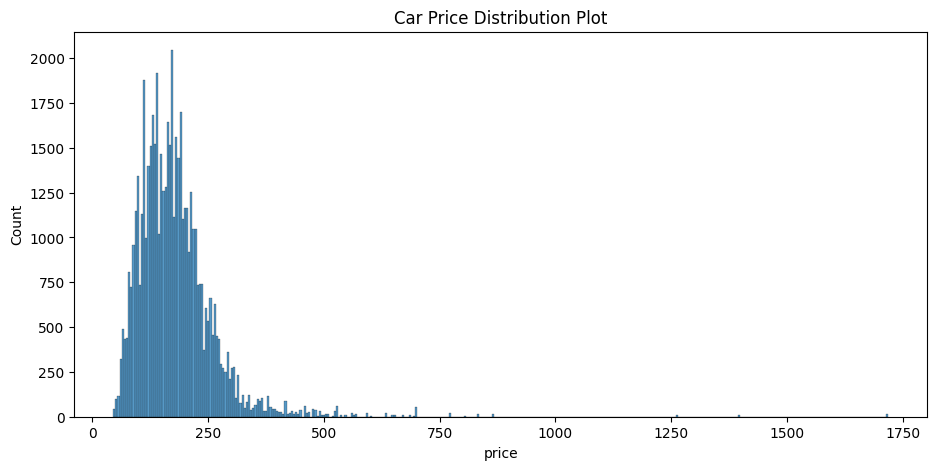

In [57]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.histplot(train['price'])
plt.title('Car Price Distribution Plot')

<Axes: >

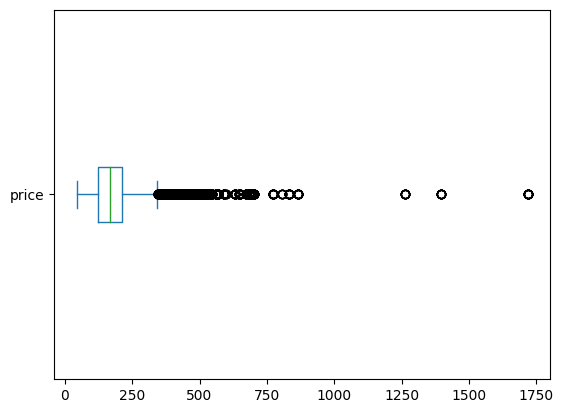

In [58]:
train['price'].plot(kind='box',vert=False)

In [59]:
train=remove_outliers(train,'price')
train.shape

(52548, 14)

<Axes: >

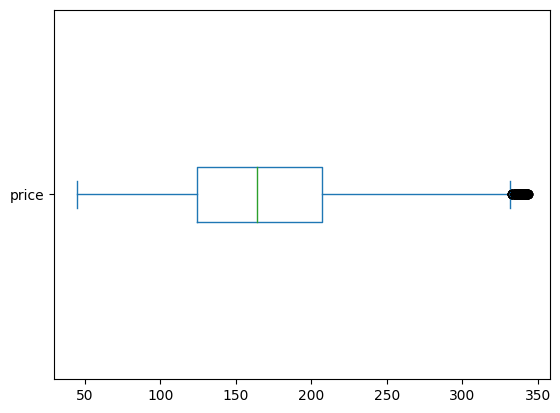

In [60]:
train['price'].plot(kind='box',vert=False)

<ipython-input-61-846f12fc8c65>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

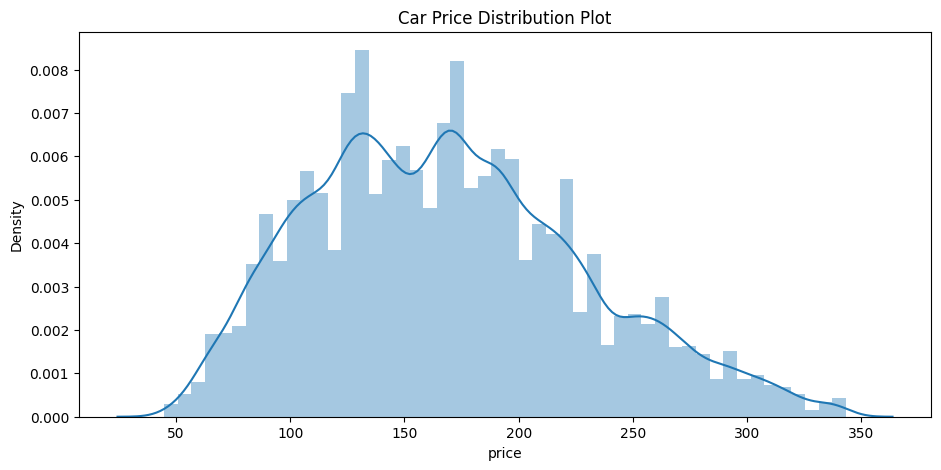

In [61]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(train['price'])
plt.title('Car Price Distribution Plot')

<Axes: >

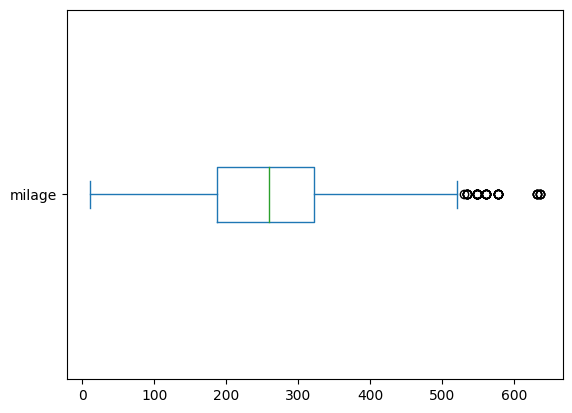

In [62]:
train['milage'].plot(kind='box',vert=False)

In [63]:
train=remove_outliers(train,'milage')
train.shape

(52494, 14)

<Axes: >

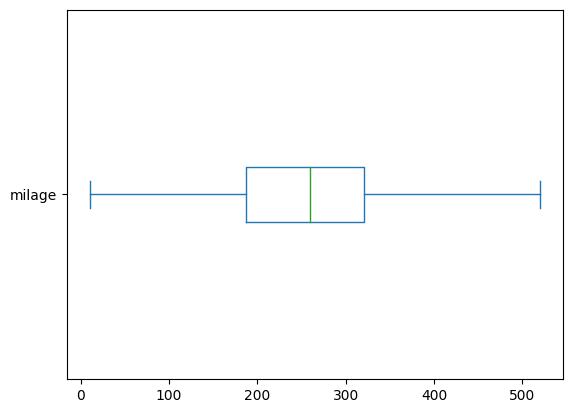

In [64]:
train['milage'].plot(kind='box',vert=False)

<Axes: >

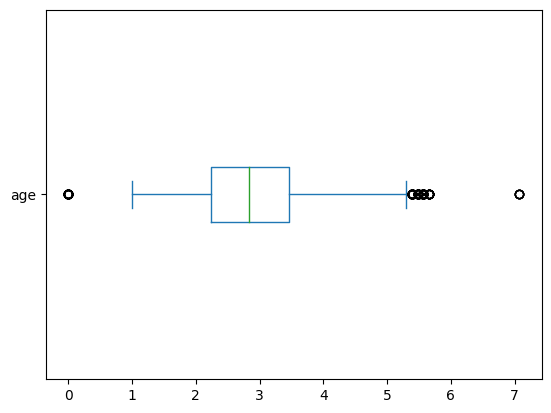

In [65]:
train['age'].plot(kind='box',vert=False)

In [66]:
train=remove_outliers(train,'age')
train.shape

(52315, 14)

<Axes: >

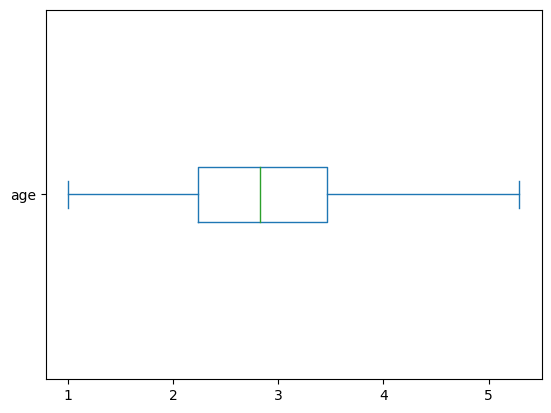

In [67]:
train['age'].plot(kind='box',vert=False)

<Axes: >

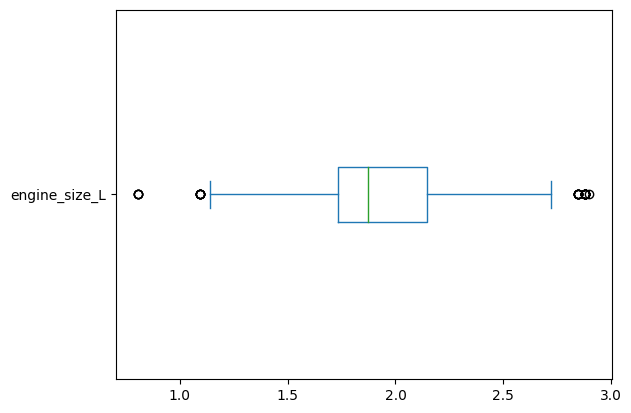

In [68]:
train['engine_size_L'].plot(kind='box',vert=False)

In [69]:
train=remove_outliers(train,'engine_size_L')
train.shape

(52279, 14)

<Axes: >

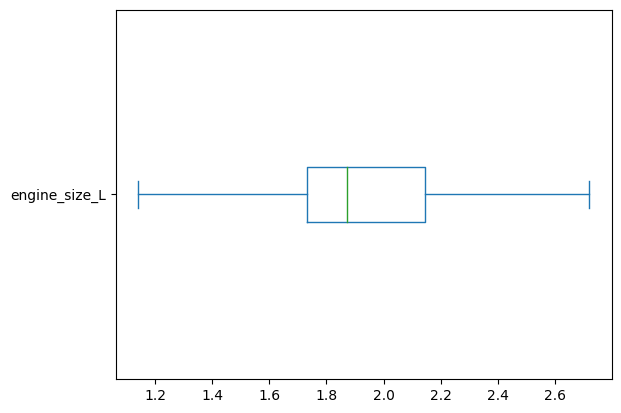

In [70]:
train['engine_size_L'].plot(kind='box',vert=False)

<Axes: >

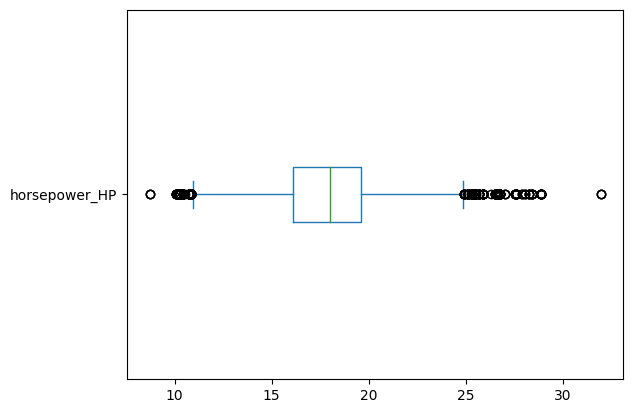

In [71]:
train['horsepower_HP'].plot(kind='box',vert=False)

In [72]:
train=remove_outliers(train,'horsepower_HP')
train.shape

(51828, 14)

<Axes: >

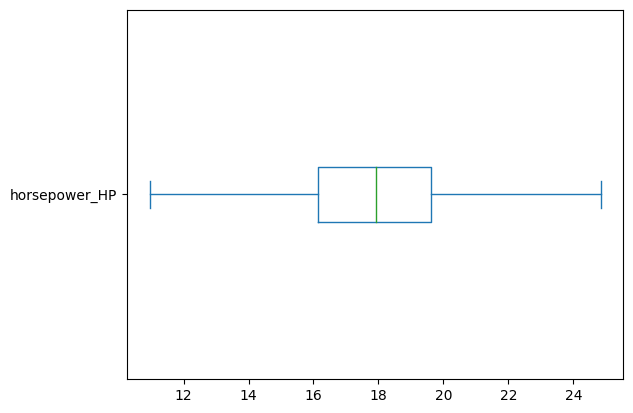

In [73]:
train['horsepower_HP'].plot(kind='box',vert=False)

<Axes: >

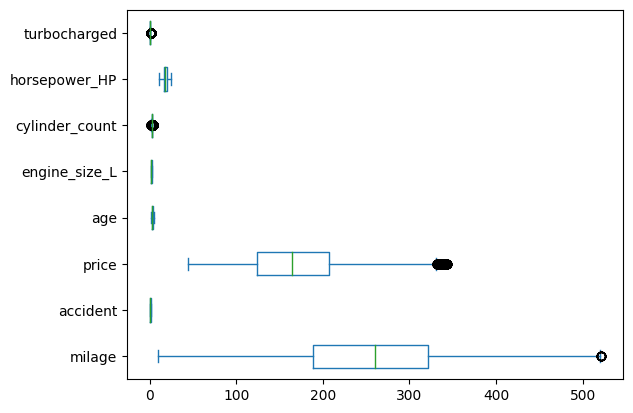

In [74]:
train[train.select_dtypes(include=['int64','float64']).columns.tolist()].plot(kind='box',vert=False)

<Axes: title={'center': 'Price and milage'}, xlabel='price', ylabel='milage'>

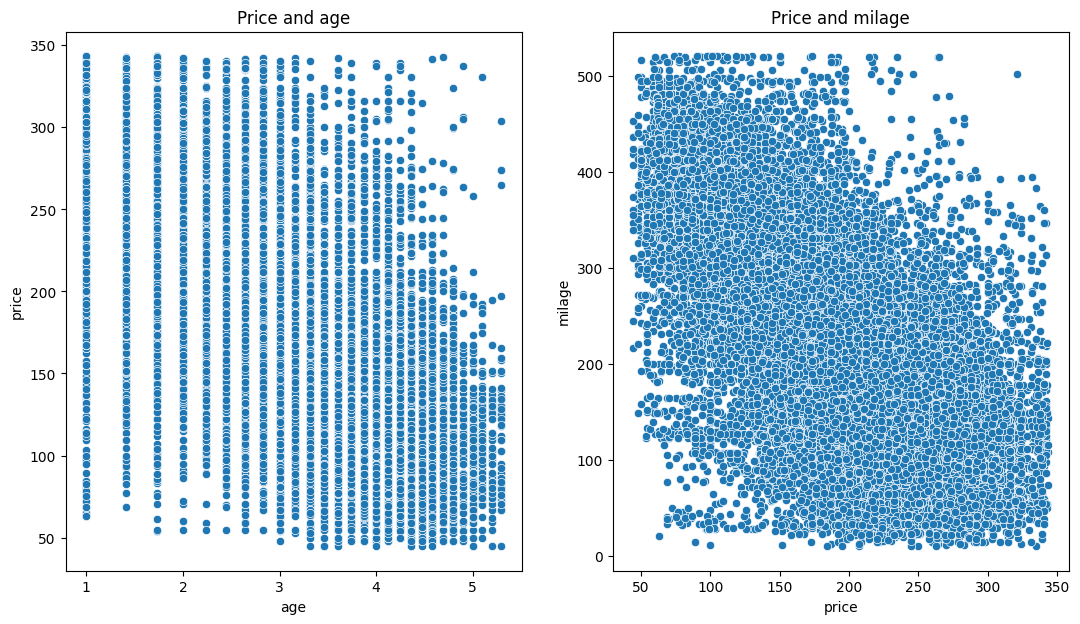

In [75]:
# lets check the linearity using a scatter plot
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and age")
sns.scatterplot(x='age',y='price',data=train)

plt.subplot(1,3,2)
plt.title("Price and milage")
sns.scatterplot(x='price',y='milage',data=train)



<Axes: xlabel='price', ylabel='Count'>

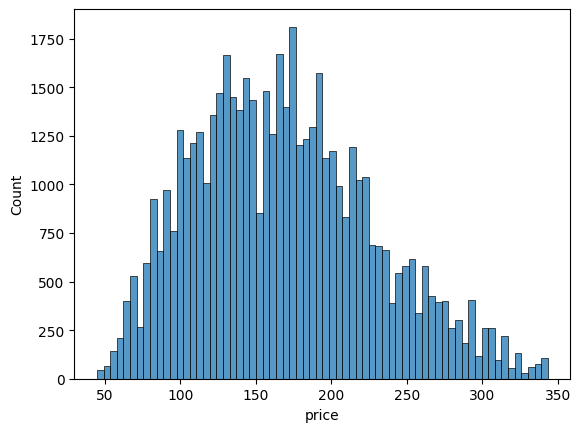

In [76]:
sns.histplot(train['price'])

In [77]:
test.describe()

,brand,model,milage,accident,age,engine_size_L,cylinder_count,horsepower_HP,turbocharged
count,36183.00,36183.00,36183.00,36183.00,36183.00,36183.00,36183.00,36183.00,36183.00
mean,195.30,191.21,249.76,0.26,2.84,1.90,2.49,17.99,0.03
std,31.56,50.04,100.49,0.44,0.94,0.34,0.30,2.87,0.18
min,118.84,97.61,10.00,0.00,0.00,0.81,1.73,8.37,0.00
25%,175.23,152.75,177.99,0.00,2.24,1.73,2.45,16.16,0.00
50%,195.33,187.59,256.28,0.00,2.83,1.87,2.45,18.11,0.00
75%,211.53,219.19,319.37,1.00,3.46,2.14,2.83,19.87,0.00
max,598.20,601.79,636.40,1.00,7.07,2.90,3.46,28.90,1.00


In [78]:
train.describe()

,milage,accident,price,age,engine_size_L,cylinder_count,horsepower_HP,turbocharged
count,51828.00,51828.00,51828.00,51828.00,51828.00,51828.00,51828.00,51828.00
mean,254.33,0.27,168.67,2.85,1.89,2.48,17.87,0.03
std,96.94,0.45,59.19,0.91,0.34,0.30,2.71,0.18
min,10.00,0.00,44.72,1.00,1.14,1.73,10.95,0.00
25%,188.60,0.00,124.49,2.24,1.73,2.45,16.12,0.00
50%,259.81,0.00,164.32,2.83,1.87,2.45,17.92,0.00
75%,321.36,1.00,207.12,3.46,2.14,2.83,19.62,0.00
max,520.58,1.00,343.37,5.29,2.72,3.46,24.84,1.00


In [79]:
train.head()

,brand,model,milage,fuel_type,ext_col,int_col,accident,price,transmission_mode,age,engine_size_L,cylinder_count,horsepower_HP,turbocharged
id,,,,,,,,,,,,,,
0,Ford,F-150 Lariat,272.67,Gasoline,blue,gray,0.00,104.88,automatic,2.45,1.87,2.45,19.36,0.00
1,BMW,335 i,282.84,Gasoline,black,black,0.00,90.83,manual,4.12,1.73,2.45,17.32,0.00
2,Jaguar,XF Luxury,302.47,Gasoline,other,beige,0.00,122.47,automatic,3.87,2.05,2.83,17.32,0.00
3,BMW,X7 xDrive40i,49.37,Hybrid,gray,brown,0.00,251.99,dual,1.41,1.73,2.45,18.30,0.00
4,Pontiac,Firebird Base,333.17,Gasoline,white,black,0.00,88.60,automatic,4.80,1.95,2.45,14.14,0.00


In [80]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['brand', 'model', 'fuel_type', 'ext_col', 'int_col', 'transmission_mode']

In [81]:
train.brand.unique().shape

(52,)

In [82]:
train.describe()

,milage,accident,price,age,engine_size_L,cylinder_count,horsepower_HP,turbocharged
count,51828.00,51828.00,51828.00,51828.00,51828.00,51828.00,51828.00,51828.00
mean,254.33,0.27,168.67,2.85,1.89,2.48,17.87,0.03
std,96.94,0.45,59.19,0.91,0.34,0.30,2.71,0.18
min,10.00,0.00,44.72,1.00,1.14,1.73,10.95,0.00
25%,188.60,0.00,124.49,2.24,1.73,2.45,16.12,0.00
50%,259.81,0.00,164.32,2.83,1.87,2.45,17.92,0.00
75%,321.36,1.00,207.12,3.46,2.14,2.83,19.62,0.00
max,520.58,1.00,343.37,5.29,2.72,3.46,24.84,1.00


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51828 entries, 0 to 54272
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              51828 non-null  object 
 1   model              51828 non-null  object 
 2   milage             51828 non-null  float64
 3   fuel_type          51828 non-null  object 
 4   ext_col            51828 non-null  object 
 5   int_col            51828 non-null  object 
 6   accident           51828 non-null  float64
 7   price              51828 non-null  float64
 8   transmission_mode  51768 non-null  object 
 9   age                51828 non-null  float64
 10  engine_size_L      51828 non-null  float64
 11  cylinder_count     51828 non-null  float64
 12  horsepower_HP      51828 non-null  float64
 13  turbocharged       51828 non-null  float64
dtypes: float64(8), object(6)
memory usage: 5.9+ MB


In [84]:
for df in [train,test]:
  print(df.shape)

(51828, 14)
(36183, 13)


<Axes: >

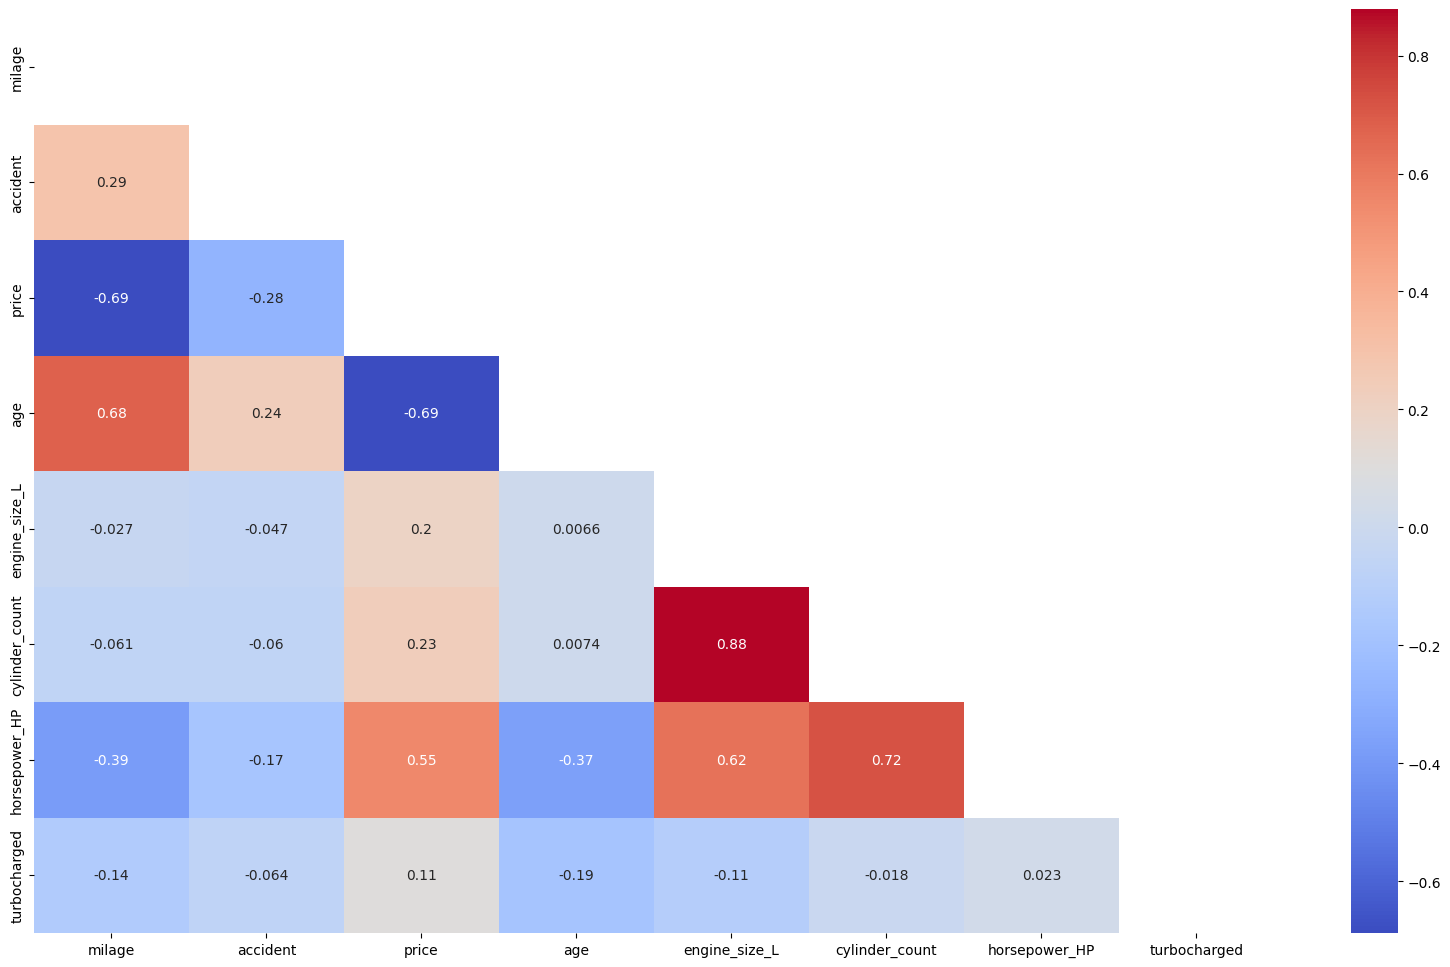

In [85]:
plt.figure(figsize=(20,12))
mask = np.triu(np.ones_like(train.corr(numeric_only=True), dtype=bool))
sns.heatmap(data=train.corr(numeric_only=True),annot=True,cmap='coolwarm' ,mask=mask)


In [86]:
for df in [train,test]:
  df.drop(columns=['cylinder_count'],axis=1, inplace=True)

<Axes: >

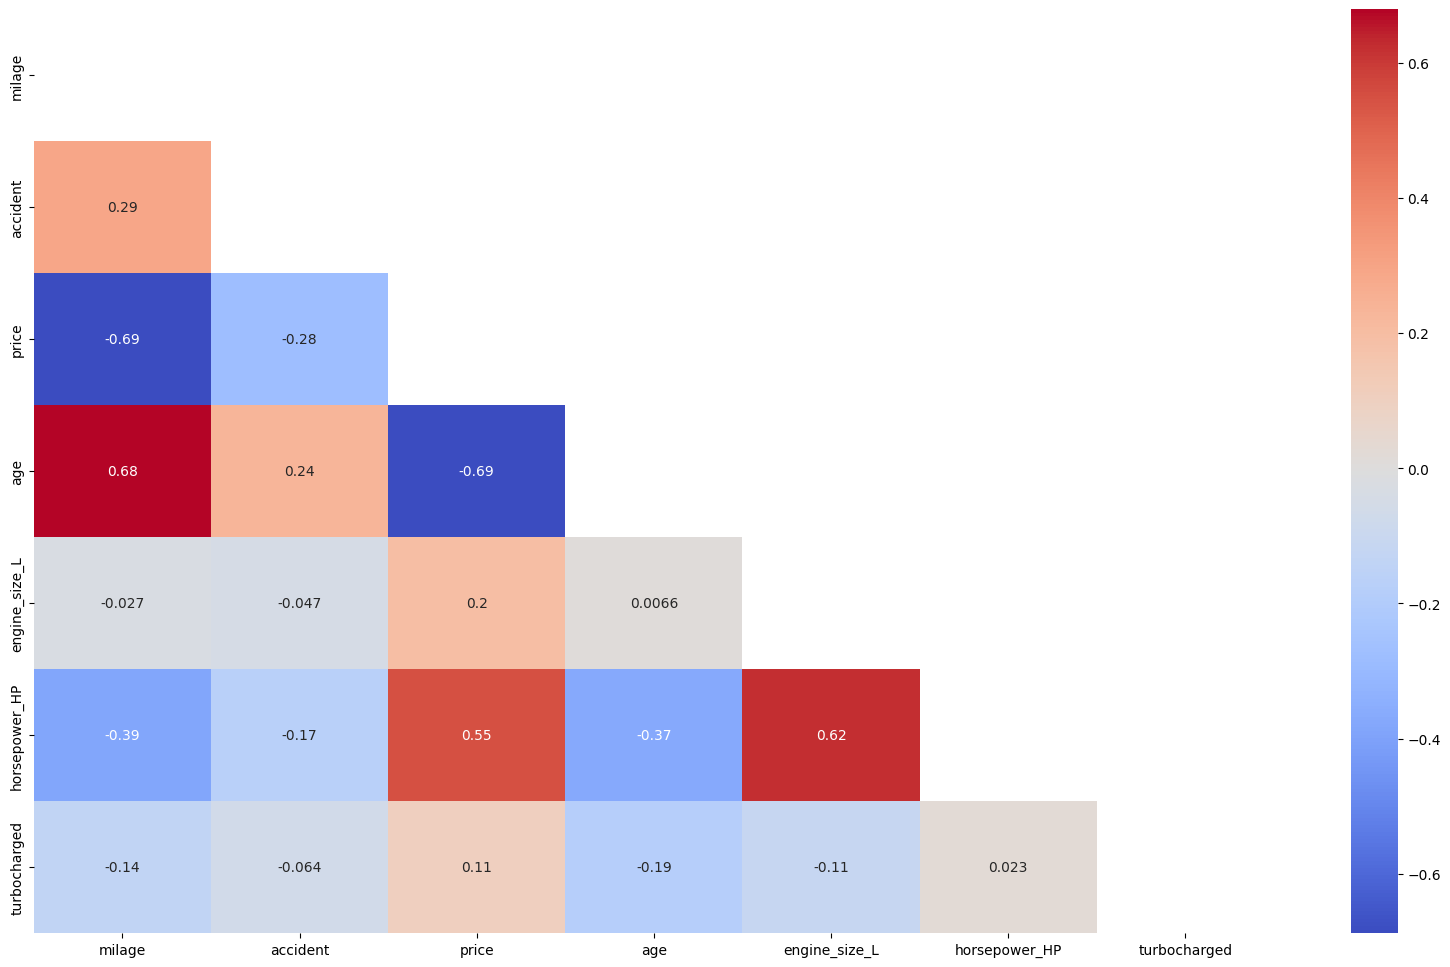

In [87]:
plt.figure(figsize=(20,12))

mask = np.triu(np.ones_like(train.corr(numeric_only=True), dtype=bool))
sns.heatmap(data=train.corr(numeric_only=True),annot=True,cmap='coolwarm' ,mask=mask)


array([[<Axes: title={'center': 'milage'}>,
        <Axes: title={'center': 'accident'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'engine_size_L'}>,
        <Axes: title={'center': 'horsepower_HP'}>],
       [<Axes: title={'center': 'turbocharged'}>, <Axes: >, <Axes: >]],
      dtype=object)

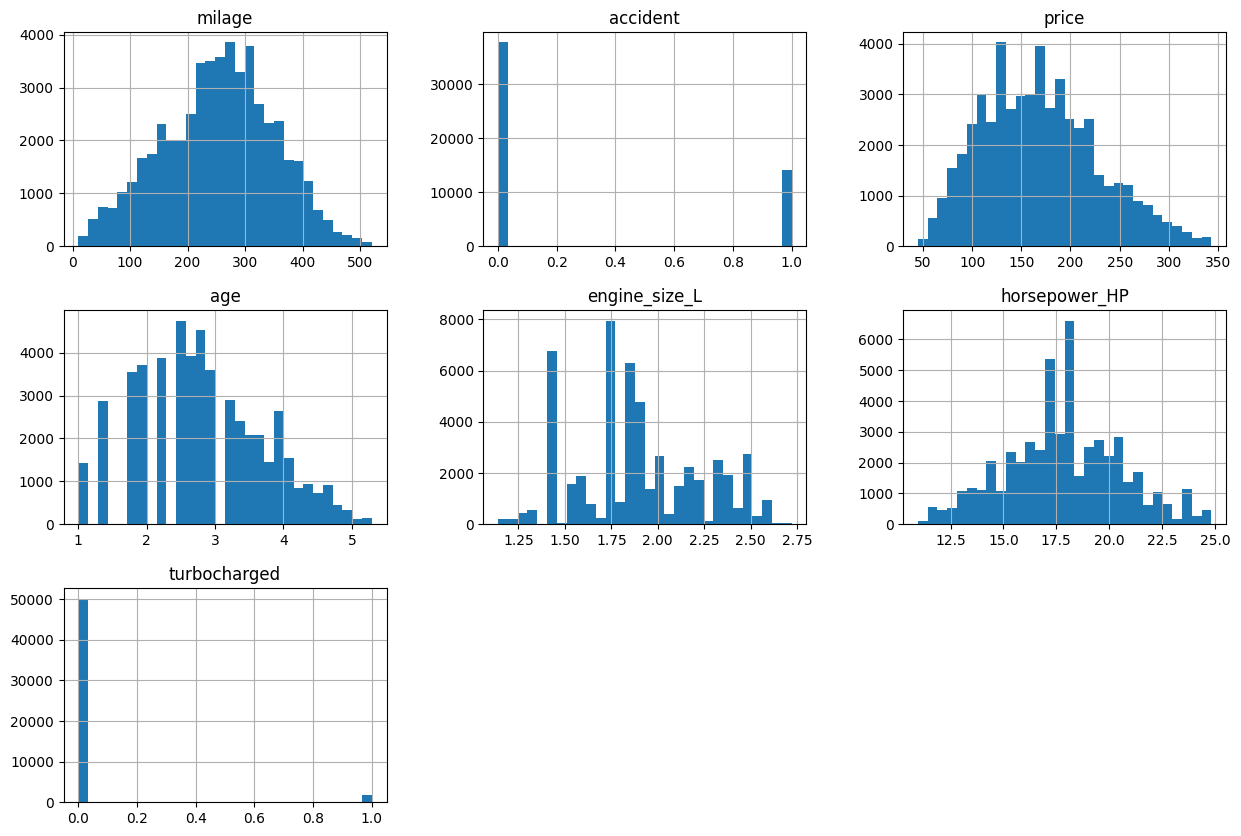

In [88]:
train.hist(figsize=(15,10),bins=30)

In [89]:
dummies_column=['fuel_type','transmission_mode','ext_col','int_col']

train = pd. get_dummies(train, columns=dummies_column, drop_first=True,dtype=int)
test = pd.get_dummies(test, columns=dummies_column, drop_first=True,dtype=int)


In [90]:
train.head(1)

,brand,model,milage,accident,price,age,engine_size_L,horsepower_HP,turbocharged,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_unknown,transmission_mode_dual,transmission_mode_manual,transmission_mode_unknown,ext_col_black,ext_col_blue,ext_col_brown,ext_col_gold,ext_col_gray,ext_col_green,ext_col_orange,ext_col_other,ext_col_red,ext_col_silver,ext_col_white,ext_col_yellow,int_col_black,int_col_blue,int_col_brown,int_col_gold,int_col_gray,int_col_green,int_col_orange,int_col_other,int_col_red,int_col_silver,int_col_white,int_col_yellow
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Ford,F-150 Lariat,272.67,0.00,104.88,2.45,1.87,19.36,0.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [91]:
# for df in [train,test]:
  # df.drop('model',axis=1,inplace=True)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51828 entries, 0 to 54272
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      51828 non-null  object 
 1   model                      51828 non-null  object 
 2   milage                     51828 non-null  float64
 3   accident                   51828 non-null  float64
 4   price                      51828 non-null  float64
 5   age                        51828 non-null  float64
 6   engine_size_L              51828 non-null  float64
 7   horsepower_HP              51828 non-null  float64
 8   turbocharged               51828 non-null  float64
 9   fuel_type_E85 Flex Fuel    51828 non-null  int64  
 10  fuel_type_Gasoline         51828 non-null  int64  
 11  fuel_type_Hybrid           51828 non-null  int64  
 12  fuel_type_Plug-In Hybrid   51828 non-null  int64  
 13  fuel_type_unknown          51828 non-null  int64  


In [93]:
train.shape

(51828, 41)

In [94]:
train.isna().sum()

brand                        0
model                        0
milage                       0
accident                     0
price                        0
age                          0
engine_size_L                0
horsepower_HP                0
turbocharged                 0
fuel_type_E85 Flex Fuel      0
fuel_type_Gasoline           0
fuel_type_Hybrid             0
fuel_type_Plug-In Hybrid     0
fuel_type_unknown            0
transmission_mode_dual       0
transmission_mode_manual     0
transmission_mode_unknown    0
ext_col_black                0
ext_col_blue                 0
ext_col_brown                0
ext_col_gold                 0
ext_col_gray                 0
ext_col_green                0
ext_col_orange               0
ext_col_other                0
ext_col_red                  0
ext_col_silver               0
ext_col_white                0
ext_col_yellow               0
int_col_black                0
int_col_blue                 0
int_col_brown                0
int_col_

In [95]:
X=train.drop(columns=['price'],axis=1)
y=train['price']

In [96]:
# from sklearn.feature_selection import SelectKBest, f_regression
# selector = SelectKBest(score_func=f_regression, k=10)
# X_new = selector.fit_transform(X, y)
# selected_feature_names = X.columns[selector.get_support(indices=True)]
# selected_feature_names

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1111)

In [98]:

for i in ['brand','model']:
  train_feature, test_feature=mean_target_encoding(pd.concat([X_train,y_train],axis=1),pd.concat([X_test,y_test],axis=1),target='price',categorical=i,alpha=5)
  X_train[i]=np.sqrt(train_feature)
  X_test[i]=np.sqrt(test_feature)


In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

test = scaler.transform(test)
# Apply PCA
# pca = PCA(n_components=40)  # Retain 95% of the variance
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)
# test = pca.transform(test)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [101]:
from xgboost import XGBRegressor


# Training the model
# {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000}

model = XGBRegressor()
model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test_scaled)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Calculating R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


RMSE: 35.02073510980645
R² Score: 0.65485002412191


In [102]:
# Find the best model

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import lightgbm as lgbm
from lightgbm import LGBMRegressor


models = {
    'Linear Regression Model': LinearRegression(),
    'Random Forest Model': RandomForestRegressor(),
    'Gradient Boosted Trees Model': GradientBoostingRegressor(),
    'Cart Model': DecisionTreeRegressor(),
    'Distributed Gradient Boosted Trees Model': HistGradientBoostingRegressor(),
    'Ridge Model': Ridge(),
    'Lasso Model': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'XGB': XGBRegressor(),
    'LGBM': LGBMRegressor()
}

best_r2 = float(0)
best_model = None

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = [r2,rmse]
    print(f"{name} R2: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with r2: {best_r2:.4f}")

Linear Regression Model R2: 0.6548
Random Forest Model R2: 0.6527
Gradient Boosted Trees Model R2: 0.6631
Cart Model R2: 0.3227
Distributed Gradient Boosted Trees Model R2: 0.6691
Ridge Model R2: 0.6548
Lasso Model R2: 0.6458
Decision Tree Regressor R2: 0.3296
XGB R2: 0.6549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 41462, number of used features: 40
[LightGBM] [Info] Start training from score 168.549802
LGBM R2: 0.6696

Best Model: LGBMRegressor with r2: 0.6696


In [103]:
results

{'Linear Regression Model': [0.6547937580446566, 35.023589519809214],
 'Random Forest Model': [0.6527487636911466, 35.127175831126856],
 'Gradient Boosted Trees Model': [0.6631388484526732, 34.59766576223168],
 'Cart Model': [0.3226628704852519, 49.05957433890613],
 'Distributed Gradient Boosted Trees Model': [0.6691480230637765,
  34.28768795663361],
 'Ridge Model': [0.6547936219875983, 35.02359642177899],
 'Lasso Model': [0.6458345324673435, 35.47516638772998],
 'Decision Tree Regressor': [0.32963309654421047, 48.806494594019675],
 'XGB': [0.65485002412191, 35.02073510980645],
 'LGBM': [0.6695622481916598, 34.266217221726855]}

In [ ]:
model = LGBMRegressor()

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation R2 score: {best_score}")

# Train the model with the best parameters on the full resampled dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Test rmse score: {rmse}")
print(f"Test R2 score: {r2}")

In [ ]:
# y_test_pred=best_model.predict(test)

# submision = pd.DataFrame({'id': test.index, 'price': y_test_pred**2})
# submision.to_csv('submission.csv', index=False)


In [ ]:
from s-klearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'l2_regularization': [0, 0.01, 0.1]
}

# Initialize the model
hgb = HistGradientBoostingRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

# Make predictions on the validation set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model on the validation set
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 score on validation set: {r2:.4f}')
print(f'Mean Squared Error on validation set: {mse:.4f}')


In [ ]:
# y_test_pred=model2.predict(scaler.transform(test[selected_feature_names]))

# submision = pd.DataFrame({'id': test.index, 'price': y_test_pred**2})
# submision.to_csv('submission.csv', index=False)


In [ ]:

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initializing GridSearchCV
grid_search = GrridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluating the best model
y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best RMSE: {rmse_best}')
print(f'Best R² Score: {r2_best}')


In [ ]:
# 2d hyperparameter tuning
import itertools

# Hyperparameter grids
max_depth_grid = [3,5,7]
subsample_grid = [0.8,0.9,1.0]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in itertools.product(max_depth_grid, subsample_grid):
    params = {'max_depth': max_depth_candidate,
              'subsample': subsample_candidate}
    validation_score = get_cv_score(train, params)
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score
print(results)